In [1]:
import os
CURDIR = os.getcwd().split("\\")
if "notebooks" in CURDIR:
    n = len(CURDIR) - CURDIR.index("notebooks")
    os.chdir(os.getcwd() + ("\\.." * n))

In [38]:
import subprocess
import threading
def timeout(seconds=5):
    process2 = subprocess.Popen(['timeout',"5"],
                    stdin =subprocess.PIPE,
                    stderr =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True) 
    print(''.join(process2.stdout.readlines()))
    print(''.join(process2.stderr.readlines()))
    process = subprocess.Popen(['dir'],
                    stdin =subprocess.PIPE,
                    stderr =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True) 
    print(''.join(process.stdout.readlines()))
    print(''.join(process.stderr.readlines()))
x = threading.Thread(target=timeout, args=(5,))
x.start()


Try 'timeout --help' for more information.

 Datentr„ger in Laufwerk C: ist W0195N3553-C
 Volumeseriennummer: 7873-00E8

 Verzeichnis von c:\Users\u890640\Documents\Python Pakete\reporter

09.10.2023  15:54    <DIR>          .
09.10.2023  15:54    <DIR>          ..
09.10.2023  13:04    <DIR>          .venv
09.10.2023  12:54    <DIR>          notebooks
09.10.2023  13:07           201.266 poetry.lock
09.10.2023  13:11               734 pyproject.toml
09.10.2023  16:52                19 README.md
10.10.2023  11:00    <DIR>          reporter
               3 Datei(en),        202.019 Bytes
               5 Verzeichnis(se), 912.015.900.672 Bytes frei




In [16]:
timeout --help

TypeError: bad operand type for unary -: '_Helper'

In [2]:
from visualize import *
from prep import *
import seaborn as sns

In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
tab = prep_freq_table(diamonds, "cut").to_pandas()


In [5]:
tab

,cut,count,proportion
0,Good,4906,0.090953
1,Premium,13791,0.255673
2,Fair,1610,0.029848
3,Ideal,21551,0.399537
4,Very Good,12082,0.223990


In [11]:
import pandas as pd
p = BarPlot(tab,x="cut",y="count")
from reporter.utils import DataPlot
plot = DataPlot(p)
plot.create()

"with open(r'C:\\Users\\u890640\\AppData\\Roaming\\reporter\\svgualjqlb.pkl','rb') as fid:\n    p = pickle.load(fid)\np.plot(10, 6)\n"

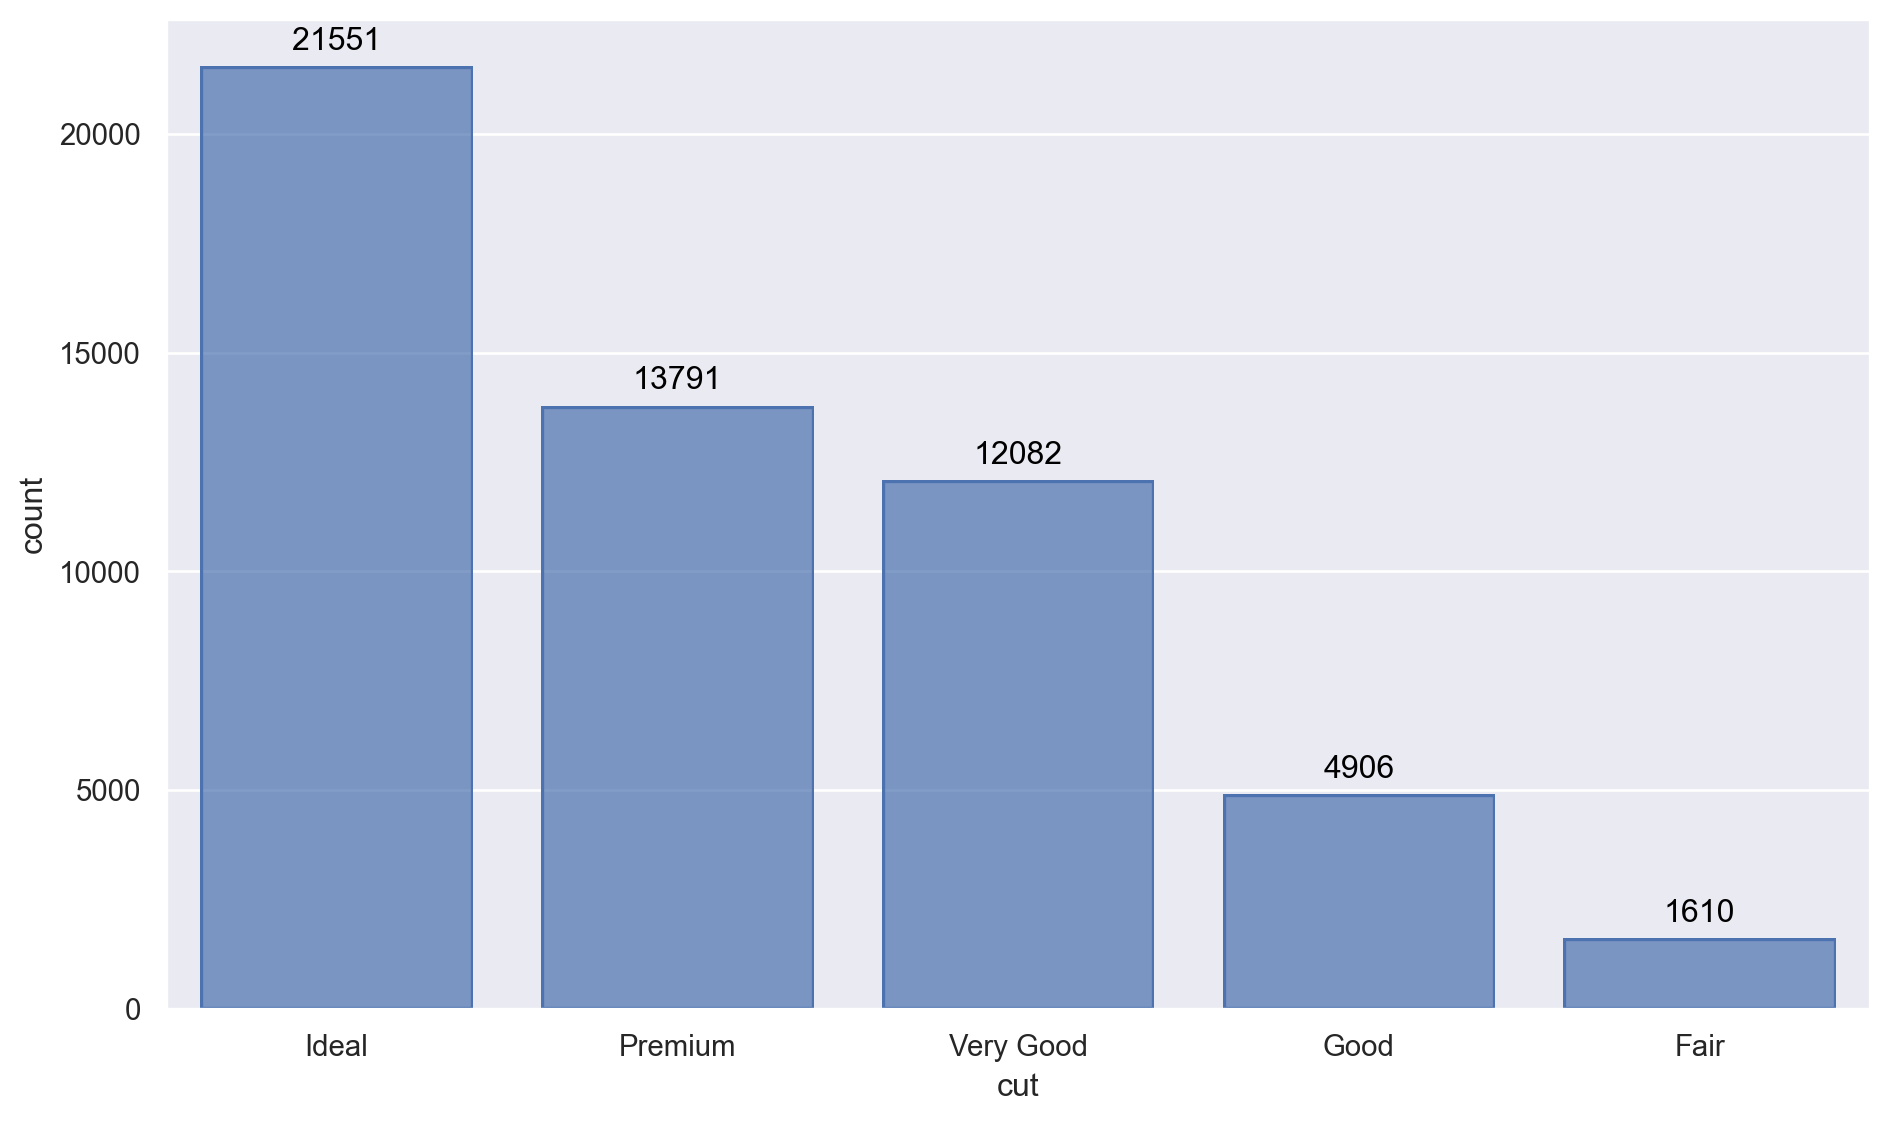

In [8]:
plot.plot()